#  ---------- Bike Sharing System 2011 ----------


<img src='./img/descarga.png' width='800px' height='100px'>

*****


### Información del DataFrame

1. **instant**: índice del registro.
   - Este campo simplemente contiene un número de índice que identifica cada registro en el conjunto de datos.

2. **dteday**: fecha.
   - Este campo almacena la fecha en la que se registró la información.

3. **season**: estación (1: invierno, 2: primavera, 3: verano, 4: otoño).
   -  Indica la estación del año en la que se registraron los datos, con valores numéricos que corresponden a las estaciones.

4. **yr**: año (0: 2011, 1: 2012).
   - Representa el año en el que se registraron los datos, donde "0" se refiere a 2011 y "1" a 2012.

5. **mnth**: mes (1 a 12).
   - Indica el mes en el que se registraron los datos, con valores numéricos del 1 al 12 correspondientes a los meses.

6. **hr**: hora (0 a 23).
   - Muestra la hora del día en la que se registraron los datos, en formato de 24 horas (0 a 23).

7. **holiday**: día festivo (si el día es festivo o no).
   - Indica si el día en cuestión es un día festivo ("1" si lo es y "0" si no lo es). La información se extrae de un calendario de festivos.

8. **weekday**: día de la semana (0 a 6).
   - Representa el día de la semana en el que se registraron los datos.

9. **workingday**: si el día es laborable (1 si el día no es fin de semana ni festivo, de lo contrario 0).
   - Indica si el día es laborable (día hábil) con un valor de "1" si no es un fin de semana ni un día festivo, y "0" en caso contrario.

10. **weathersit**: situación meteorológica en el momento de la observación, con valores numéricos que representan diferentes condiciones climáticas.

    1. Despejado, Pocas nubes.

    2. Niebla + Pocas nubes, Niebla.

    3. Lluvia ligera, presencia de Tormenta.

    4. Lluvia intensa + Granizo + Tormenta.

11. **temp**: temperatura normalizada en Celsius.
    - La temperatura se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

12. **atemp**: sensación térmica normalizada en Celsius.
    - Al igual que la temperatura, la sensación térmica se encuentra normalizada y se expresa en grados Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

13. **hum**: humedad normalizada.
    - La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

14. **windspeed**: velocidad del viento normalizada.
    - La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

15. **casual**: conteo de usuarios casuales.
    - Muestra la cantidad de usuarios que alquilaron bicicletas de forma casual.

16. **registered**: conteo de usuarios registrados.
    - Indica la cantidad de usuarios que están registrados en el sistema y alquilaron bicicletas.

17. **cnt**: conteo total de bicicletas alquiladas, incluyendo usuarios casuales y registrados.
    - Representa el total de bicicletas alquiladas en un período determinado, incluyendo tanto a usuarios casuales como a usuarios registrados.


*****


## Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#VARIABLES

ALPHA = 0.05

## Carga de Datos

In [2]:
df = pd.read_csv('./data/bike+sharing+dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.shape

(17379, 17)

Como solo voy a trabajar con un año para mi hipótesis. Elegí el 2011.

In [4]:
df2011= df.query('yr == 0')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df2011.shape

(8645, 17)

In [6]:
df2011.to_csv('./data/Dataset_2011.csv', index=False) 

In [7]:
df2012 = df.query('yr == 1')
df2012.to_csv('./data/Dataset_2012.csv', index=False)

## Primera exploración

In [8]:
#Vista de primeros datos
df2011 = pd.read_csv('./data/Dataset_2011.csv',sep=',')
df2011.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# ¿Cuántas filas y columnas tenemos?
df2011.shape

(8645, 17)

In [10]:
# ¿Los nombres de nuestras columnas?
df2011.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#Obtenemos información general del dataframe a tráves de los métodos info() y describe() -> solo númericas
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8645 non-null   int64  
 1   dteday      8645 non-null   object 
 2   season      8645 non-null   int64  
 3   yr          8645 non-null   int64  
 4   mnth        8645 non-null   int64  
 5   hr          8645 non-null   int64  
 6   holiday     8645 non-null   int64  
 7   weekday     8645 non-null   int64  
 8   workingday  8645 non-null   int64  
 9   weathersit  8645 non-null   int64  
 10  temp        8645 non-null   float64
 11  atemp       8645 non-null   float64
 12  hum         8645 non-null   float64
 13  windspeed   8645 non-null   float64
 14  casual      8645 non-null   int64  
 15  registered  8645 non-null   int64  
 16  cnt         8645 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.1+ MB


In [12]:
df2011.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8645.000000,8645.000000,8645.0,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,0.0,6.573973,11.573626,0.027646,3.012724,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,2495.740872,1.105477,0.0,3.428147,6.907822,0.163966,2.006370,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,0.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,4323.000000,3.000000,0.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,6484.000000,3.000000,0.0,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,8645.000000,4.000000,0.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


De las diecisiete columnas, doce de ellas son númericas, a excepción de season que la consideraré como categórica ordinal. Cuatro de tipo cuantitativo continuo y un object que debemos de convertir a el tipo correcto de dato: datetime.

In [13]:
for i in df2011:
    print(f"La cardinalidad de la variable {i} es {(df2011[i].nunique()/df2011.shape[0])*100:.2f}%")

La cardinalidad de la variable instant es 100.00%
La cardinalidad de la variable dteday es 4.22%
La cardinalidad de la variable season es 0.05%
La cardinalidad de la variable yr es 0.01%
La cardinalidad de la variable mnth es 0.14%
La cardinalidad de la variable hr es 0.28%
La cardinalidad de la variable holiday es 0.02%
La cardinalidad de la variable weekday es 0.08%
La cardinalidad de la variable workingday es 0.02%
La cardinalidad de la variable weathersit es 0.05%
La cardinalidad de la variable temp es 0.56%
La cardinalidad de la variable atemp es 0.75%
La cardinalidad de la variable hum es 1.02%
La cardinalidad de la variable windspeed es 0.34%
La cardinalidad de la variable casual es 2.65%
La cardinalidad de la variable registered es 5.95%
La cardinalidad de la variable cnt es 6.77%


Variables como "instant", "dteday", "season", "mnth", "day", "hr", "weekday", "holiday", "workingday", "weathersit", y "seasonteam" tienen porcentajes de cardinalidad muy bajos (menos del 1%). Esto sugiere que estas variables tienen una concentración significativa de valores y no son muy diversas.

Variables como "temperature", "thermal_sensation", "wind_speed", "casual", "registered", y "cnt" tienen porcentajes de cardinalidad más altos, lo que sugiere una mayor diversidad en los valores.

La variable "humidity" tiene un porcentaje de cardinalidad relativamente alto (1.02%), indicando una diversidad moderada en los valores de humedad.

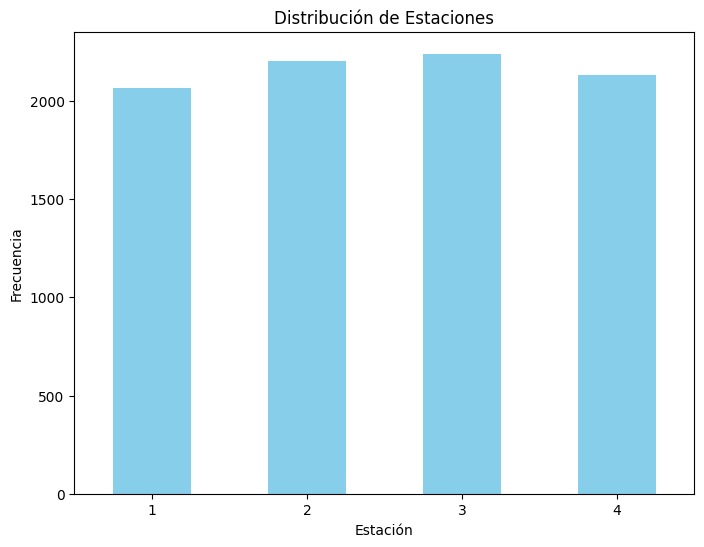

Cardinalidad de 'season': 4


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

season_cardinality = df2011['season'].nunique()

# Visualización
plt.figure(figsize=(8, 6))
df2011['season'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Estaciones')
plt.xlabel('Estación')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

print(f"Cardinalidad de 'season': {season_cardinality}")

## Limpieza

In [15]:
df2011.set_index('instant',inplace=True)
df2011.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
df2011['dteday'] = pd.to_datetime(df2011['dteday'])
df2011.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8645 entries, 1 to 8645
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      8645 non-null   datetime64[ns]
 1   season      8645 non-null   int64         
 2   yr          8645 non-null   int64         
 3   mnth        8645 non-null   int64         
 4   hr          8645 non-null   int64         
 5   holiday     8645 non-null   int64         
 6   weekday     8645 non-null   int64         
 7   workingday  8645 non-null   int64         
 8   weathersit  8645 non-null   int64         
 9   temp        8645 non-null   float64       
 10  atemp       8645 non-null   float64       
 11  hum         8645 non-null   float64       
 12  windspeed   8645 non-null   float64       
 13  casual      8645 non-null   int64         
 14  registered  8645 non-null   int64         
 15  cnt         8645 non-null   int64         
dtypes: datetime64[ns](1), float64

In [17]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])['cnt'].sum() #Faltan días festivos, 1 de Enero, 25 de Diciembre

dteday      holiday  weekday
2011-01-17  1        1          1000
2011-02-21  1        1          1107
2011-04-15  1        5          3126
2011-05-30  1        1          4098
2011-07-04  1        1          6043
2011-09-05  1        1          3351
2011-10-10  1        1          5117
2011-11-11  1        5          3368
2011-11-24  1        4          1495
2011-12-26  1        1          1317
Name: cnt, dtype: int64

In [18]:
import holidays
from datetime import date

us_holidays = holidays.UnitedStates(state='DC')
df['holiday'] = df['dteday'].apply(lambda x: 1 if x in us_holidays else 0)

df2011['day'] = df2011['dteday'].dt.day

df2011['weekday'] = df2011['dteday'].dt.day_of_week

In [19]:
# Función para actualizar la columna 'workingday'.
def actualizar_workingday(row):
    if row['weekday'] in [5, 6] or row['holiday'] == 1:
        return 0
    else:
        return 1

# Aplicar la función a cada fila del DataFrame
df2011['workingday'] = df2011.apply(actualizar_workingday, axis=1)

In [20]:
df2011.query('holiday == 1').groupby(['dteday', 'holiday','weekday'])[['cnt']].sum().sort_values(by='dteday')

,,,cnt
dteday,holiday,weekday,
2011-01-17,1,0,1000
2011-02-21,1,0,1107
2011-04-15,1,4,3126
2011-05-30,1,0,4098
2011-07-04,1,0,6043
2011-09-05,1,0,3351
2011-10-10,1,0,5117
2011-11-11,1,4,3368
2011-11-24,1,3,1495


In [21]:
df2011.drop(columns=['yr'],inplace=True) 
df2011.head()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2,2011-01-01,1,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
3,2011-01-01,1,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
4,2011-01-01,1,1,3,0,5,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
5,2011-01-01,1,1,4,0,5,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


- La instancia la tomaré como índice.
- Los días festivos ('holiday'), los días de la semana ('weekday') no eran correctos, así que tuvimos que arreglarlos reescribiendo los mismos.
- los 'Workingday' se basan en 'holiday' y  weekday' por ende, también me propuse a reescribirlo en base a aquellas variables para evitar futuros errores
.

Fuente : ['calendario_2011-USA'](https://www.cuandoenelmundo.com/calendario/estados-unidos/2011) and **Librería holidays**
- Eliminamos la variable **'yr'** ya que representaba el 2011 en valores = 0.

****

In [22]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.027646,3.009485,0.683748,1.437594,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448,15.665240
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000,8.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000,16.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000,23.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000,31.000000
std,NaN,1.105477,3.428147,6.907822,0.163966,2.000845,0.465040,0.653859,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854,8.793108


- Season: Podemos ver que la temporada de verano abarca la media y el 75%.
- temp, atemp, hum, windspeed: Los valores normalizados no son tan visibles al momento de tratar con aquellos datos.
- casual, registered, cnt : Los valores máximos se encuentran bastante alejados.


*****

- **temp**: Temperatura normalizada en Celsius. Los valores se han ajustado y se dividen entre 41, donde 41 es la temperatura máxima posible.

- **atemp**: Sensación térmica normalizada en Celsius. Los valores se han ajustado y se dividen entre 50, donde 50 es la sensación térmica máxima posible.

- **hum**: La humedad se encuentra normalizada y los valores se dividen entre 100, donde 100 representa la humedad máxima posible.

- **windspeed**: La velocidad del viento se encuentra normalizada y los valores se dividen entre 67, donde 67 es la velocidad máxima posible del viento.

*Aplicamos la fórmula ajustada:*

Temperatura Discreta = valor_ajustado_temp = **0.24** **×** multiplicamos por su ajuste = **41**

*Calculamos el resultado:*

Temperatura Discreta = round(9.84)

Temperatura Discreta =10

In [23]:
df2011 = df2011.assign(
    temperature = (lambda x : round(x.temp * 41)),
    thermal_sensation = (lambda x : round(x.atemp * 50)),
    humidity = (lambda x : round(x.hum * 100)),
    wind_speed = (lambda x: round(x.windspeed * 67))
)

In [24]:
df2011.drop(columns= ['temp','atemp','hum', 'windspeed'], inplace=True)

In [25]:
df2011.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.027646,3.009485,0.683748,1.437594,28.600578,115.193869,143.794448,15.665240,20.035049,23.453788,64.342973,12.808213
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,26.000000,31.000000,8.000000,13.000000,16.000000,49.000000,7.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,14.000000,90.000000,109.000000,16.000000,20.000000,24.000000,65.000000,13.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,38.000000,168.000000,211.000000,23.000000,27.000000,31.000000,81.000000,19.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,272.000000,567.000000,651.000000,31.000000,39.000000,50.000000,100.000000,57.000000
std,NaN,1.105477,3.428147,6.907822,0.163966,2.000845,0.465040,0.653859,38.840789,109.461014,133.797854,8.793108,8.126433,8.851484,19.629328,8.253896


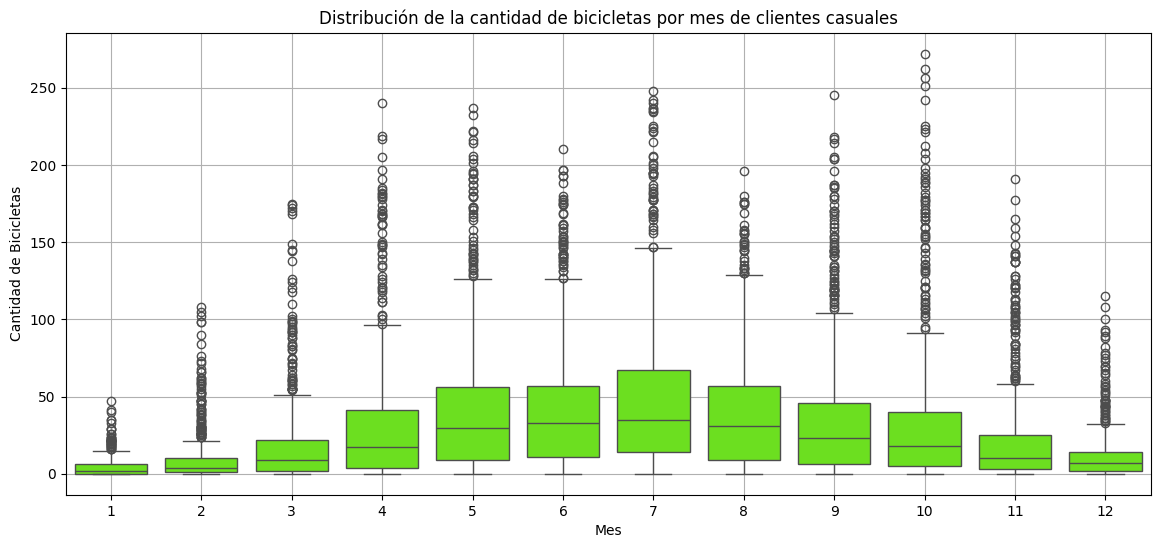

In [72]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='mnth', y='casual', data=df2011, color='#66FF00')

plt.grid(True)
plt.title('Distribución de la cantidad de bicicletas por mes de clientes casuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Bicicletas')
plt.show()

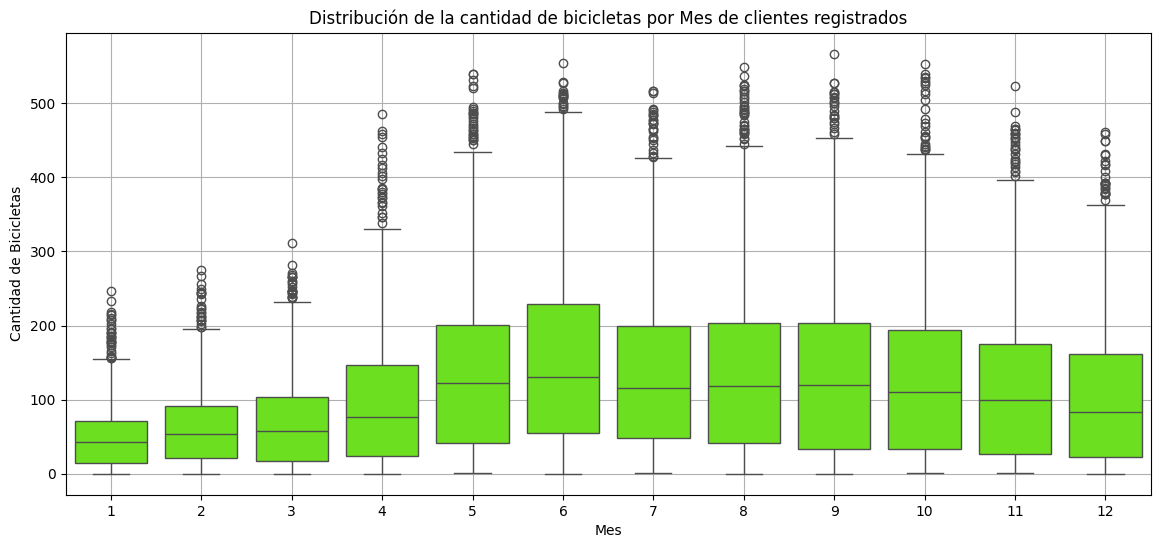

In [73]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='mnth', y='registered', data=df2011, color='#66FF00')

plt.grid(True)
plt.title('Distribución de la cantidad de bicicletas por Mes de clientes registrados')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Bicicletas')
plt.show()

Podemos ver que contamos con muchos outliers, lo que requiere por mi parte un análisis más profundo, de porque o con que debería imputar dichos valores, para no perder información en mis datos.

*****

- Ahora analizaremos si se encuentran valores nulos como duplicados y trataremos con ellos para después de la limpieza comenzar a responder nuestra hipótesis.

El dataframe se encuentra armado en base a horas, es decir, por día tendremos 24 registros.

- *Nos damos cuenta que faltan datos: **365 * 24 = 8760***

In [28]:
df2011.shape

(8645, 16)

In [29]:
df2011['dteday'].nunique()

365

In [37]:
df_hour = df2011.groupby(['dteday','mnth', 'holiday','weekday'])[['hr']].count()
df_hour

,,,,hr
dteday,mnth,holiday,weekday,
2011-01-01,1,0,5,24
2011-01-02,1,0,6,23
2011-01-03,1,0,0,22
2011-01-04,1,0,1,23
2011-01-05,1,0,2,23
...,...,...,...,...
2011-12-27,12,0,1,24
2011-12-28,12,0,2,23
2011-12-29,12,0,3,24


In [41]:
horas_faltantes = df_hour.query('hr <= 20')
horas_faltantes.reset_index()

,dteday,mnth,holiday,weekday,hr
0,2011-01-18,1,0,1,12
1,2011-01-26,1,0,2,16
2,2011-01-27,1,0,3,8
3,2011-02-22,2,0,1,18
4,2011-08-27,8,0,5,18
5,2011-08-28,8,0,6,17


- Como no hubo utilidad de las bicicletas durante dichas horas, no figura en la Base de Datos. Ahora la pregunta es, vale rellenar con valores aquellas filas restantes que equivalen al 1,43% del total.

La respuesta es:  Depende de lo que queramos resolver. Como mi análisis de trabajo no se reducirá a nivel horario, no encuentro lo suficiente como para generar esos datos que al final, solo nos dicen que no hay movimiento durante aquel día, hora del mes.

******

In [33]:
df2011.isnull().sum()

dteday               0
season               0
mnth                 0
hr                   0
holiday              0
weekday              0
workingday           0
weathersit           0
casual               0
registered           0
cnt                  0
day                  0
temperature          0
thermal_sensation    0
humidity             0
wind_speed           0
dtype: int64

In [34]:
df2011.duplicated(keep=False).sum()

0

Para tratar con los outliers de nuestros clientes, luego de visualizar mi hipótesis a nivel semanal, me encontre con patrones de como estos se movían en función de la misma. Al notar dichos gráficos que van a ser representados durante la hipóteiss, logré encontrar una base para poder imputar aquellos outliers.

Recordemos que mi idea principal es adaptar el negocio de un sistema compartido de bicicletas a la demanda, por lo que los días festivos, no los imputaré ya que eso nos indica el mayor uso que se puede llegar a tener y un potencial de clientes que podemos atraer a nuestro negocio.

- Por parte de los registrados estos parecen ser de rutina, es decir, su aumento de uso es durante la semana por lo que podemos deducir, que es por trabajo o vida universitaria, etc. Por lo que si hay un aumento durante el fin de semana superando el de la semana, lo consideraré outlier y lo imputaré con la mediana.

- Por parte de los casuales estos parecen ser de "disfrute", es decir, su aumento de uso es durante los fines de semana por lo que podemos deducir, que es por turismo, alguna juntada familiar o de amigos, etc. Por lo que si hay un aumento durante la semana superando el del fin de semana, lo consideraré outlier y lo imputaré con la mediana.

- La mediana la utilizo poque la media es más propensa a sufrir fluctuaciones por valores grandes o chicos.

****

casuales

In [53]:
df_casual = df2011.query('casual >= 150 and weekday >= 0 and weekday <= 4 and holiday == 0').groupby(['weekday', 'dteday','hr'])[['casual']].count().reset_index()
df_casual

# df2011.query('dteday == "2011-11-25"')
# df2011.query('dteday == "2011-08-23"')

# df2011.query('dteday == "2011-07-04"') # -> un lunes -> feriado


,weekday,dteday,hr,casual
0,1,2011-08-23,15,1
1,4,2011-11-25,15,1


registrados

In [66]:
# df2011.query('dteday == "2011-08-28"')
df_reg = df2011.query('registered >= 300 and weekday >= 5 and holiday == 0').groupby(['weekday', 'dteday' , 'hr'])[['registered']].count().reset_index()
df_reg

,weekday,dteday,hr,registered
0,6,2011-08-28,13,1
1,6,2011-08-28,15,1
2,6,2011-09-11,16,1
3,6,2011-09-25,16,1


In [67]:
def imputar_outliers_por_fecha_y_hora(df, hora, columna_a_tratar, fecha_especifica=None):
    """
    Imputa outliers en la columna_casual basándose en la mediana condicional de la fecha y/o la hora.

    Parámetros:
    - df: DataFrame, conjunto de datos.
    - hora: int, valor entre 0 y 23 inclusive que representa la hora del día.
    - fecha_especifica: str, fecha específica en formato 'yyyy-mm-dd'. Por defecto es None.
    - columna_casual: str, nombre de la columna que se va a imputar.

    Retorna:
    - DataFrame con outliers imputados en la columna_a_tratar.
    """
    
    # Calcula la mediana condicional de la columna_a_tratar
    mediana_condicional = df[columna_a_tratar].median()
    
    # Define la condición para seleccionar la fila específica
    condicion = (df['dteday'] == fecha_especifica) & (df['hr'] == hora)

    # Imputa el outlier basándose en la mediana condicional solo para la fila que cumple con la condición
    df.loc[condicion, columna_a_tratar] = mediana_condicional

    return df


In [68]:
for index, row in df_reg.iterrows():
    # Accede a los valores de cada columna por fila
    hora = row['hr']
    fecha = row['dteday']
    registered_value = 'registered'

    # Luego, puedes pasar estas variables como parámetros a tu función
    datos_con_outliers_imputados = imputar_outliers_por_fecha_y_hora(df2011, hora, registered_value,fecha)


In [69]:
for index, row in df_casual.iterrows():
    # Accede a los valores de cada columna por fila
    hora = row['hr']
    fecha = row['dteday']
    casual_value = 'casual'
    
    datos_con_outliers_imputados = imputar_outliers_por_fecha_y_hora(df2011, hora, casual_value,fecha)

In [71]:
datos_con_outliers_imputados.describe()

,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt,day,temperature,thermal_sensation,humidity,wind_speed
count,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,2011-07-03 09:29:50.213996800,2.513592,6.573973,11.573626,0.027646,3.009485,0.683748,1.437594,28.564141,115.092192,143.794448,15.665240,20.035049,23.453788,64.342973,12.808213
min,2011-01-01 00:00:00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2011-04-04 00:00:00,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,26.000000,31.000000,8.000000,13.000000,16.000000,49.000000,7.000000
50%,2011-07-04 00:00:00,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,14.000000,90.000000,109.000000,16.000000,20.000000,24.000000,65.000000,13.000000
75%,2011-10-02 00:00:00,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,38.000000,167.000000,211.000000,23.000000,27.000000,31.000000,81.000000,19.000000
max,2011-12-31 00:00:00,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,272.000000,567.000000,651.000000,31.000000,39.000000,50.000000,100.000000,57.000000
std,NaN,1.105477,3.428147,6.907822,0.163966,2.000845,0.465040,0.653859,38.780412,109.382149,133.797854,8.793108,8.126433,8.851484,19.629328,8.253896


In [74]:
datos_con_outliers_imputados['cnt'] = datos_con_outliers_imputados['casual'] + datos_con_outliers_imputados['registered']

In [75]:
column_order = ['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday', 'workingday', 'temperature', 'thermal_sensation', 'humidity',
                'weathersit',  'wind_speed', 'casual', 'registered', 'cnt']

# Reordenar las columnas
datos_con_outliers_imputados = datos_con_outliers_imputados[column_order]

In [76]:
datos_con_outliers_imputados.columns

Index(['dteday', 'season', 'mnth', 'day', 'hr', 'weekday', 'holiday',
       'workingday', 'temperature', 'thermal_sensation', 'humidity',
       'weathersit', 'wind_speed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [77]:
datos_con_outliers_imputados.to_csv('./data/Dataset_clear_2011.csv')

In [49]:
# sns.pairplot(df2011)


<img src='./img/pairplot.png' width='1000px' height='1000px'>

## Análisis 

### Análisis Univariante

In [3]:
df2011 = pd.read_csv('./data/Dataset_clear_2011.csv',index_col='instant',parse_dates=['dteday'])
df2011.head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


 ¿Es dispersa? ¿Tiene asimetría? ¿En qué sentido? ¿Por qué? ¿Hay outliers?

In [4]:
from utils.mis_funciones import grafico_univariante, grafico_bivariante

In [80]:
# def grafico_univariante(df : pd.DataFrame, columna):
#     """ Psamos un Dataframe con su columna, para que nos retorne dos gráficos.
#     - El primero será de tipo boxplot con medidas estadísticas : mediana - std.
#     - El segundo será un histograma para ver como es la distribución de los datos.
    
#     Args:
#         df (DataFrame): typo dataframe
#         columna (_type_): 
        
#     """
#     fig, ax = plt.subplots(figsize=(8, 8))

#     # Agregar el gráfico de caja (boxplot) arriba
#     sns.boxplot(df[columna], ax=ax, showfliers=False, vert=False)

#     media = np.mean(df[columna])
#     median_val = np.median(df[columna])
#     std_val = np.std(df[columna])

#     ax.axvline(median_val, color='red', linestyle='dashdot', linewidth=2, label=f'Median: {median_val:.2f}')
#     ax.axvline(media + std_val, color='black', linestyle='dashdot', linewidth=2, label=f'std: {std_val:.2f}')
#     ax.axvline(media - std_val, color='black', linestyle='dashdot', linewidth=2, label=f'std: {std_val:.2f}')

#     leg = ax.legend()
#     leg.set_bbox_to_anchor((1, 0.05)) 

#     # Eliminar los ticks del eje y del gráfico de caja
#     ax.set_yticklabels([])
    # ax.set_yticks([])

    # # Agregar el gráfico de histograma en el centro
    # ax_hist = fig.add_axes([0.1, 0.45, 0.8, 0.4])
    # sns.histplot(df[columna], kde=False, ax=ax_hist)

    # # Ajustar la posición del gráfico de caja
    # pos = ax.get_position()
    # pos.y0 = 1.02
    # ax.set_position(pos)

    # ax_hist.set_ylabel('Frequency');

kurtosis: -0.99
simetria: -0.00
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


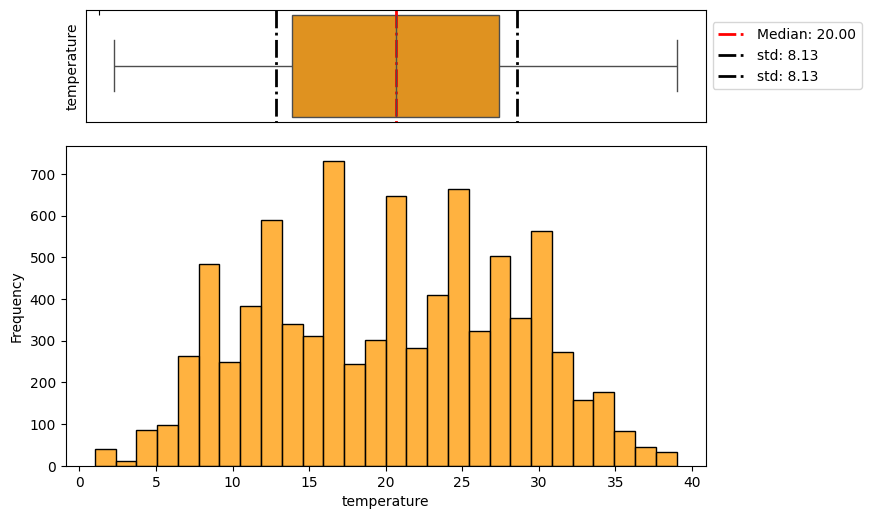

In [5]:
grafico_univariante(df2011,'temperature')

kurtosis: -0.88
simetria: -0.08
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


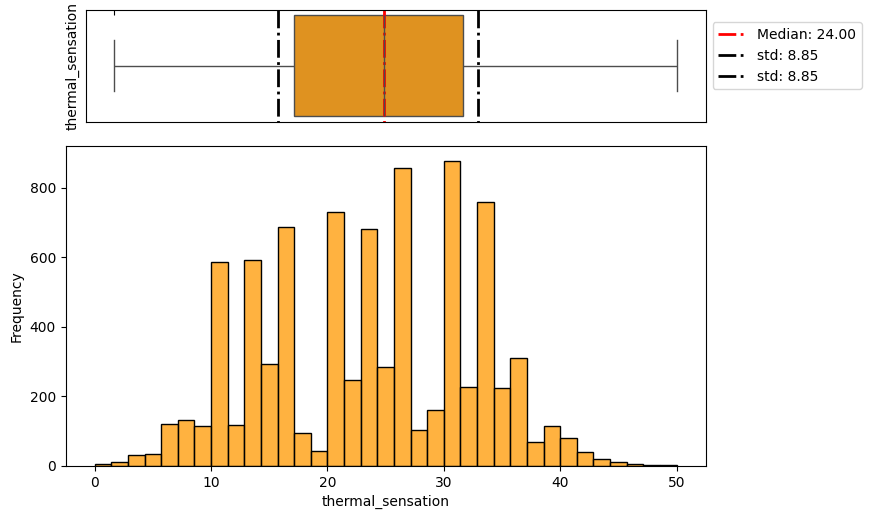

In [6]:
grafico_univariante(df2011,'thermal_sensation')

kurtosis: 0.57
simetria: 0.55
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


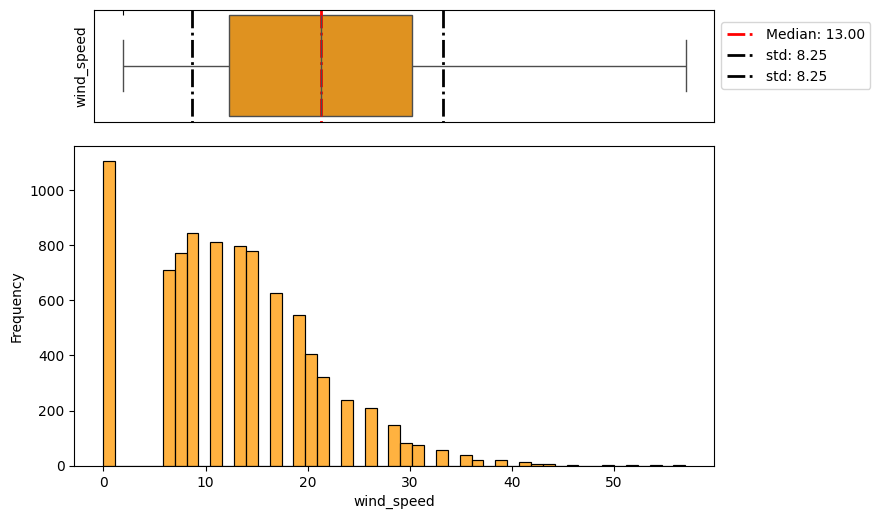

In [7]:
grafico_univariante(df2011,'wind_speed')

kurtosis: 6.52
simetria: 2.38
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica positiva (sesgo hacia la derecha).


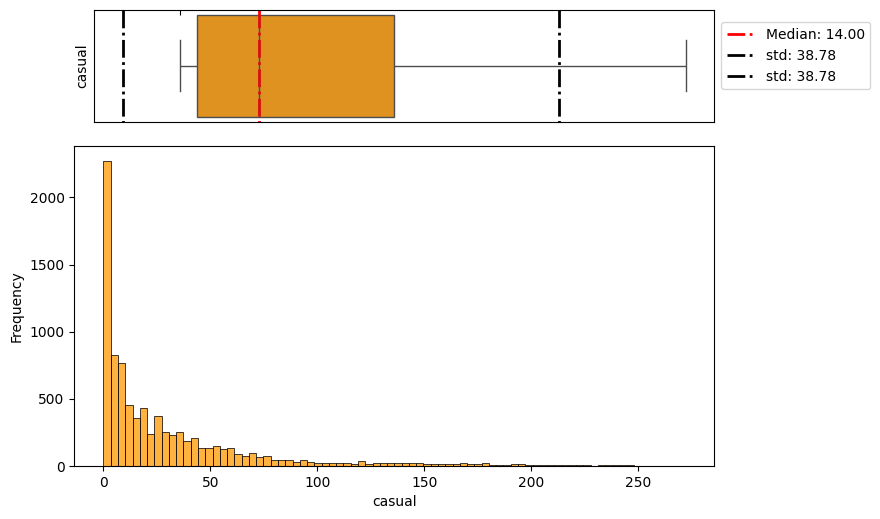

In [9]:
grafico_univariante(df2011,'casual')

kurtosis: 1.94
simetria: 1.40
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


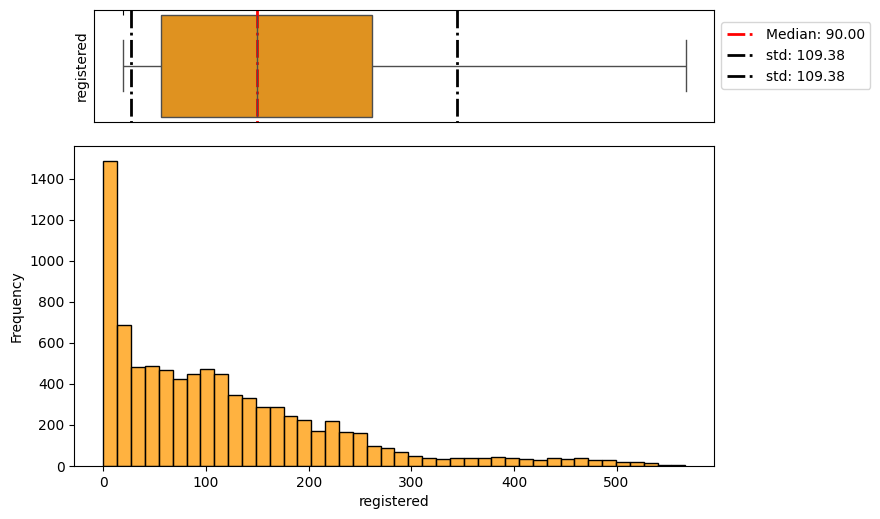

In [10]:
grafico_univariante(df2011,'registered')

kurtosis: 0.76
simetria: 1.13
La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.
La distribución es asimétrica positiva (sesgo hacia la derecha).


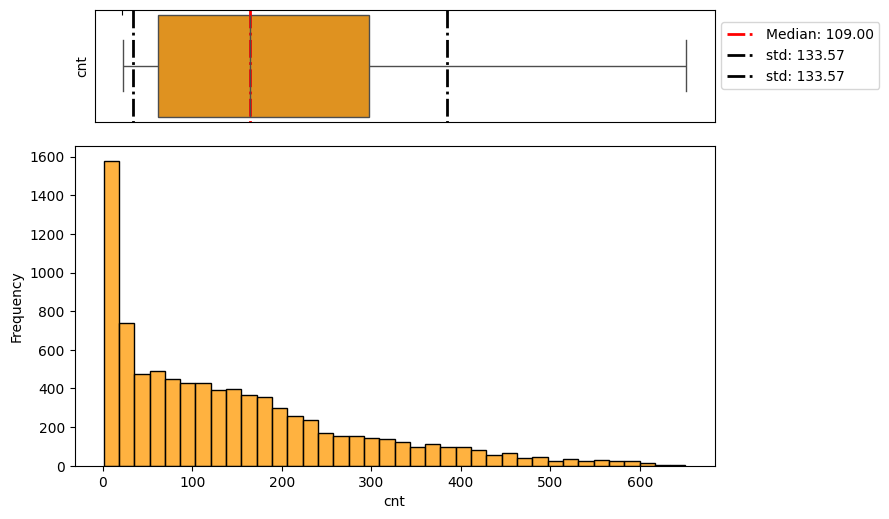

In [8]:
grafico_univariante(df2011,'cnt')

In [61]:
# rojo = "#FF0033"
# df2011.hist(figsize=(20,15),grid=False,color=rojo);

### Análisis Bivariante

In [62]:
# def grafico_bivariante(df : pd.DataFrame, x : str, y: str, type : str, title=None) -> sns.jointplot:
#     """ Grafico bivariante con el fin de retornar un jointplot entre variables para un análisis más práctico
#     arg:
#     df : DataFrame
#     x : columna de df que se quiere analizar en el eje x - tipo STR
#     y : columna de df que se quiere analizar en el eje y - tipo STR
#     type : tipo de gráfica que se quiere mostrar, puede ser ['scatter' , 'kde' , 'hist' , 'hex' , 'reg' , 'resid'] - tipo STR
#     title :  viene por defecto en None - tipo STR
    
#     return:
#         gráfica de seaborn jointplot
#     """
#     import seaborn as sns
    
#     form = ['scatter' , 'kde' , 'hist' , 'hex' , 'reg' , 'resid']
#     if type in form:
#         plot = sns.jointplot(data = df, x = x, y = y, kind=type, marginal_ticks=True)
#         plot.fig.suptitle(title, y=1.02)
#         plt.show()
#         return plot;
#     else:
#         print("Error en el tipo de gráfica")


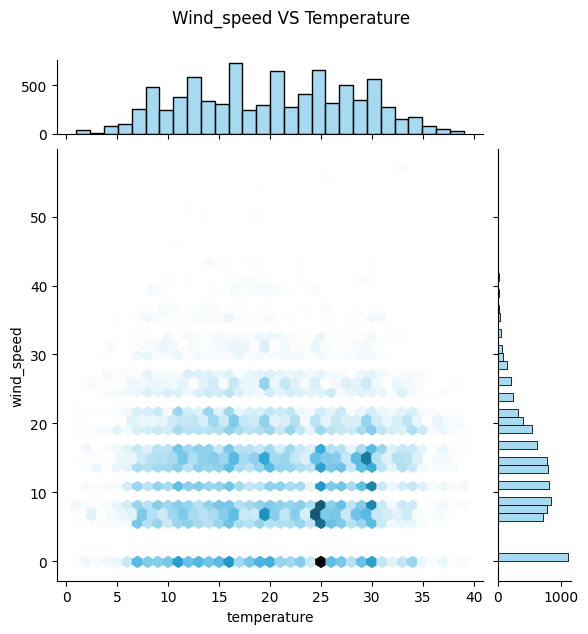

In [14]:
grafico_bivariante(df=df2011,x='temperature',y='wind_speed',forma='hex', title='Wind_speed VS Temperature')

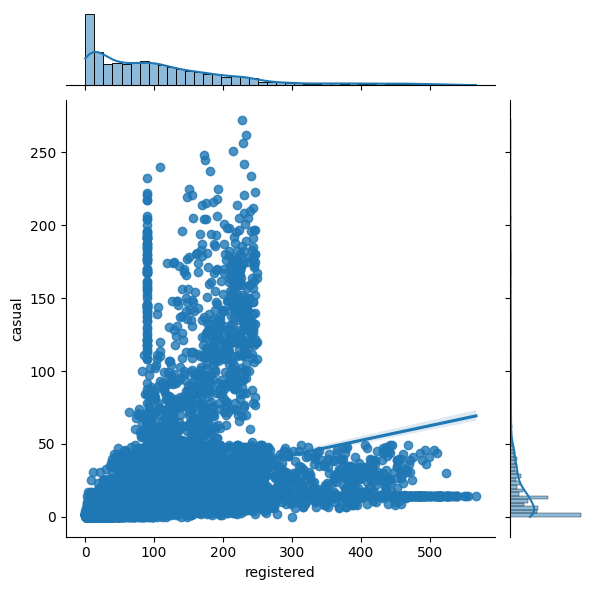

In [64]:
sns.jointplot(data=df2011,x='registered',y='casual',kind='reg');

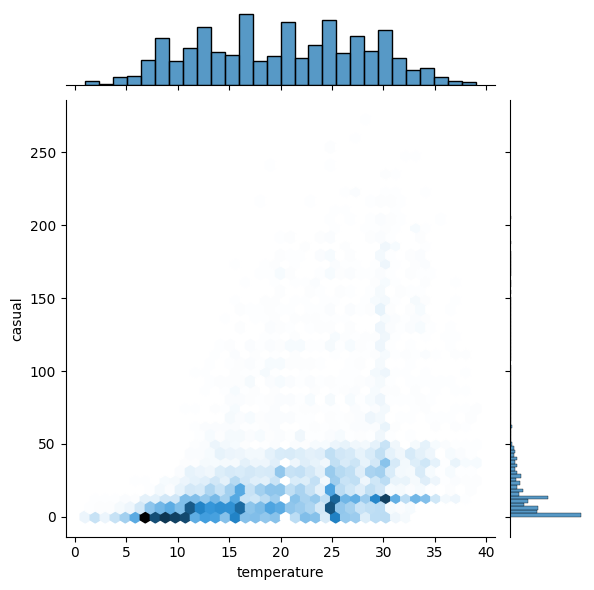

In [65]:
sns.jointplot(data=df2011,x='temperature',y='casual',kind='hex');

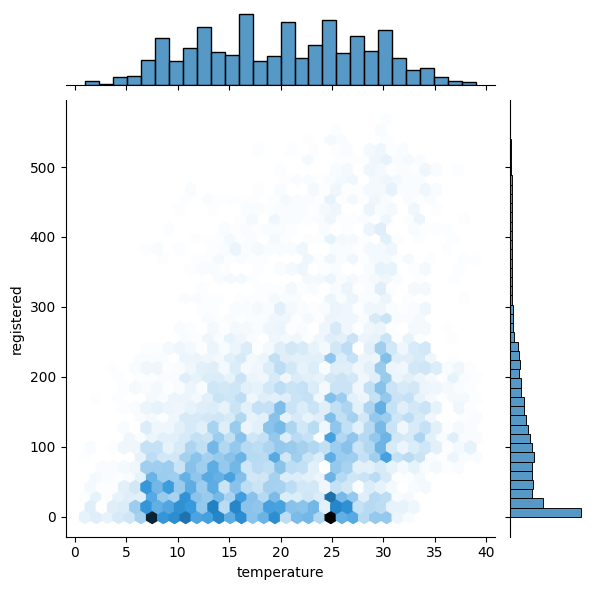

In [66]:
sns.jointplot(data=df2011,x='temperature',y='registered',kind='hex');

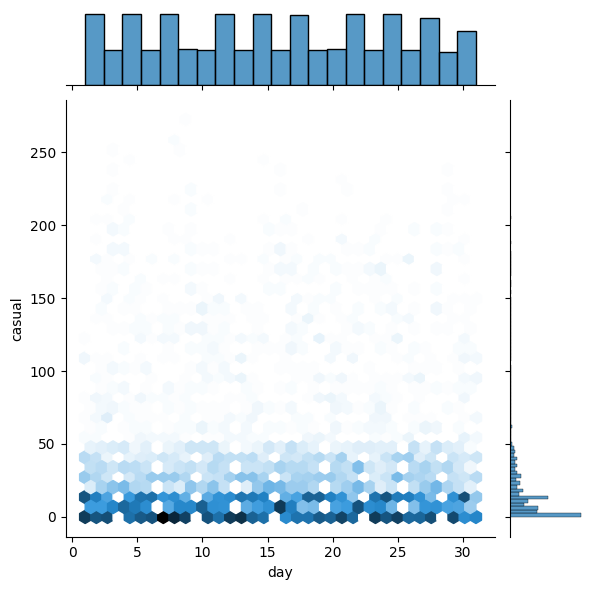

In [67]:
sns.jointplot(data=df2011,x='day',y='casual',kind='hex');

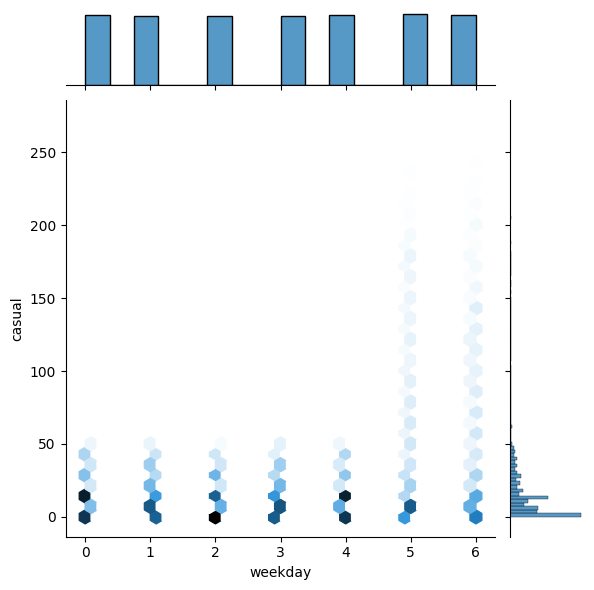

In [68]:
sns.jointplot(data=df2011,x='weekday',y='casual',kind='hex');

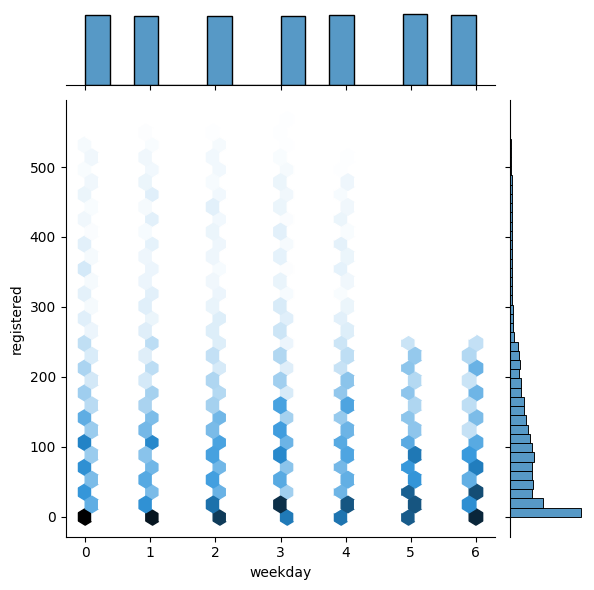

In [69]:
sns.jointplot(data=df2011,x='weekday',y='registered',kind='hex');

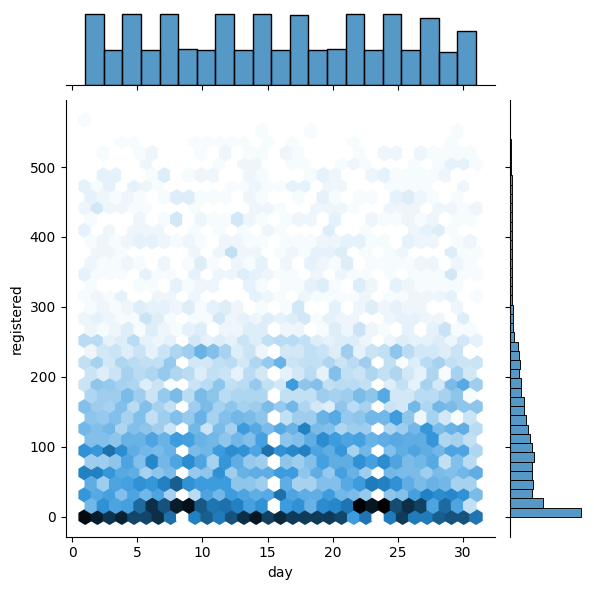

In [70]:
sns.jointplot(data=df2011,x='day',y='registered',kind='hex');

### Análisis multivariante

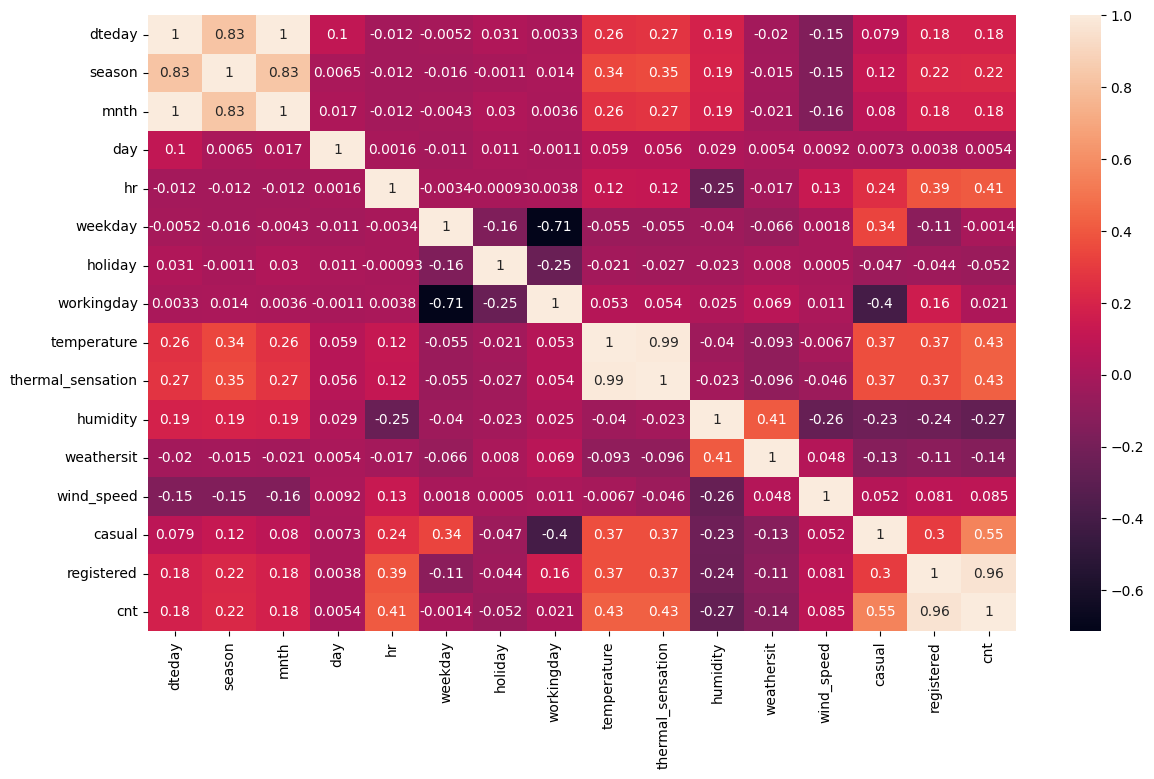

In [71]:
plt.figure(figsize=(14,8))
sns.heatmap(df2011.select_dtypes(exclude=['object']).corr(), annot=True);

## Hipótesis

 #### Hipótesis
**La hipótesis principal de este proyecto es que la estación del año tiene un 
impacto sobre la cantidad promedio de viajes en bicicleta. Específicamente, 
se espera que el uso de bicicletas varíe de manera estacional, con picos durante las 
estaciones más cálidas (primavera y verano) y una disminución en las estaciones más frías(invierno y otoño).**
 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2011 = pd.read_csv('./data/Dataset_clear_2011.csv', sep=',', parse_dates=['dteday'])
df2011.set_index('instant').head()

,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16
2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40
3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32
4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13
5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1


In [73]:
dfH1 = df2011.groupby('season')[['cnt']].mean().reset_index()
dfH1

,season,cnt
0,1,72.009188
1,2,149.287789
2,3,174.951339
3,4,147.489222


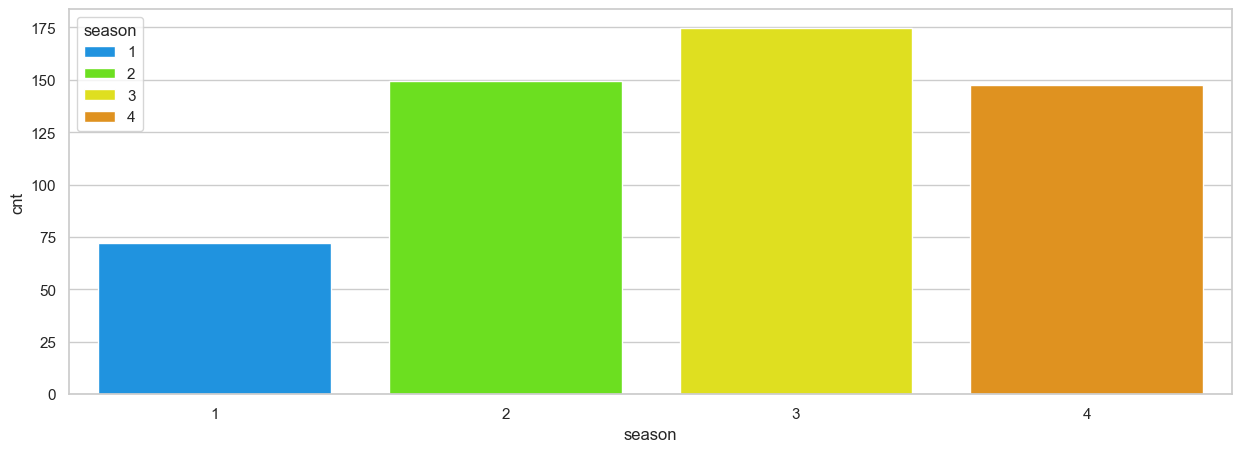

In [74]:
plt.figure(figsize=(15,5))

sns.set_theme(style="whitegrid")
sns.barplot(data= dfH1, x='season',y='cnt', hue='season', palette={1:'#0099FF',2: '#66FF00',3:'#FFFF00',4: '#FF9800'});

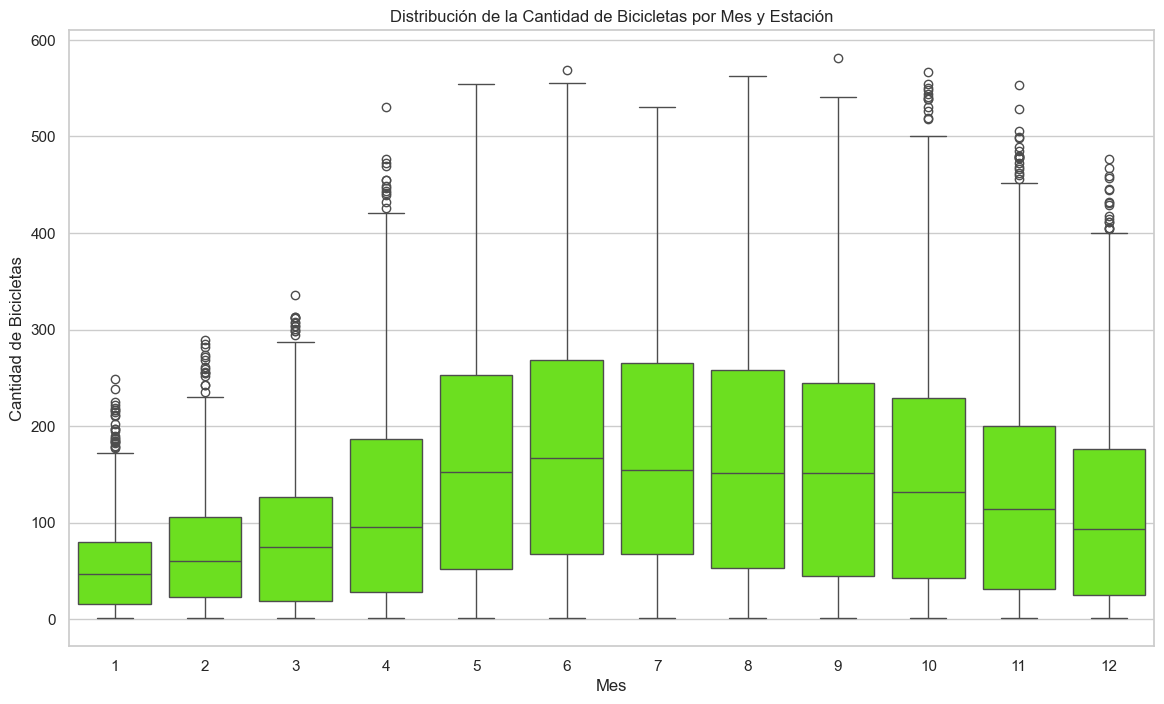

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeo de números de estación a nombres de estación
season_mapping = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
df2011['season_name'] = df2011['season'].map(season_mapping)

# Crear un gráfico de boxplot utilizando seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='mnth', y='cnt', data=df2011, color='#66FF00')
plt.title('Distribución de la Cantidad de Bicicletas por Mes y Estación')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Bicicletas')
plt.show()

In [75]:
df2011['seasonteam'] = df2011['season'].replace({1:'frio',2:'calido',3:'calido',4:'frio'})
df2011

,instant,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
0,1,2011-01-01,1,1,1,0,5,0,0,10.0,14.0,81.0,1,0.0,3,13,16,frio
1,2,2011-01-01,1,1,1,1,5,0,0,9.0,14.0,80.0,1,0.0,8,32,40,frio
2,3,2011-01-01,1,1,1,2,5,0,0,9.0,14.0,80.0,1,0.0,5,27,32,frio
3,4,2011-01-01,1,1,1,3,5,0,0,10.0,14.0,75.0,1,0.0,3,10,13,frio
4,5,2011-01-01,1,1,1,4,5,0,0,10.0,14.0,75.0,1,0.0,0,1,1,frio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,8641,2011-12-31,1,12,31,19,5,0,0,17.0,21.0,54.0,1,15.0,19,73,92,frio
8641,8642,2011-12-31,1,12,31,20,5,0,0,17.0,21.0,54.0,1,15.0,8,63,71,frio
8642,8643,2011-12-31,1,12,31,21,5,0,0,16.0,20.0,58.0,1,13.0,2,50,52,frio
8643,8644,2011-12-31,1,12,31,22,5,0,0,16.0,20.0,62.0,1,9.0,2,36,38,frio


In [76]:
ALPHA = 0.05

from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['seasonteam'] == 'frio'],
                                    df2011['cnt'][df2011['seasonteam'] == 'calido'])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre estaciones.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según la estación del año.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas")


Prueba de Mann-Whitney para dos muestras independientes: stat = 7136361.0, p_value = 4.002848563174843e-80
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre estaciones frías y cálidas


******

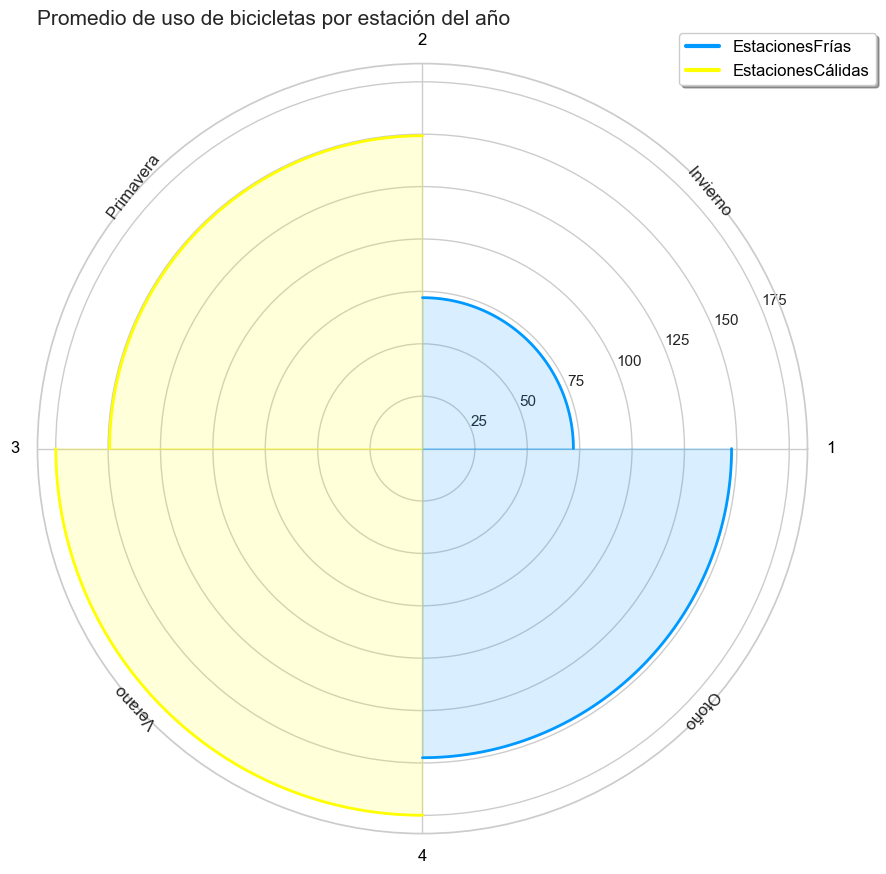

In [77]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

season = [1,2,3,4]

valores = [cant for cant in dfH1["cnt"]]
N = len(season)

angulos = [n / float(N) * 2 * np.pi for n in range(N)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),
                       subplot_kw=dict(polar=True))

plt.xticks(angulos, season, color='black', size=12)

legend_lines = [] 
season2 = ['Invierno','Primavera','Verano','Otoño']
colores = ['#0099FF', '#FFFF00', '#FFFF00','#0099FF']
x = ['left','right', 'right', 'left']
r = [-50, 53, 133, 230]

# Agregar el primer ángulo al final para cerrar el círculo
angulos += [angulos[0]]

for i in range(N):
    start_angle = angulos[i]
    end_angle = angulos[i + 1]

    # Asegurar que el ángulo final no sea menor que el ángulo inicial para la última estación
    if end_angle < start_angle:
        end_angle += 2 * np.pi

    # Interpolación para suavizar las líneas
    interp_points = 100  # Número de puntos para la interpolación
    interp_angles = np.linspace(start_angle, end_angle, interp_points)
    interp_values = np.linspace(valores[i], valores[i], interp_points)

    # Rellenar el área bajo la curva
    ax.fill_between(interp_angles, 0, interp_values, color=colores[i], alpha=0.15)

    # Graficar la línea suavizada
    line, = plt.plot(interp_angles, interp_values, linewidth=2, linestyle='solid', color=colores[i], solid_capstyle='round')

    legend_lines.append(Line2D([0], [0], color=colores[i], linewidth=3, linestyle='solid'))
    # # Etiquetas en las diagonales
    angle_mid = (start_angle + end_angle) / 2
    ax.text(angle_mid, max(valores), f" {season2[i]}", ha=x[i], va='center', rotation=r[i], fontsize='medium')

plt.legend(legend_lines, [f'Estaciones{s}' for s in ['Frías','Cálidas']], loc='best', bbox_to_anchor=(1.10, 1.05), fontsize='medium', shadow=True, labelcolor='black')

plt.title('Promedio de uso de bicicletas por estación del año', fontsize='15', fontweight='15', loc='left');


### Hipótesis 2
Según las estaciones cálidas (primavera y verano) ¿Cuál de las dos presenta a nivel promedio un uso mayor de bicicletas?

In [78]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 2],
                                    df2011['cnt'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones primavera y verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según las estaciones primavera y verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano")


Prueba de Mann-Whitney para dos muestras independientes: stat = 2193424.5, p_value = 1.4739634240084138e-10
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones primavera y verano


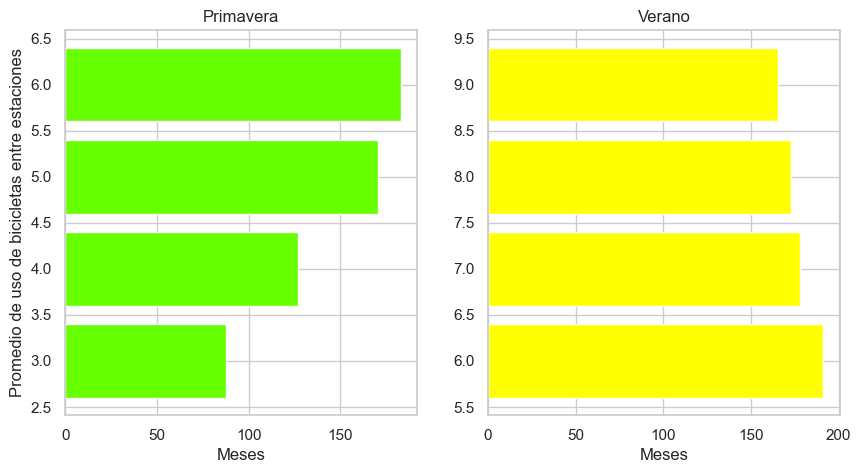

In [79]:
dfH2 = df2011.query('season == 2 or season == 3').groupby(['season','mnth'])['cnt'].mean().reset_index()
dfH2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
x = dfH2.query('season == 2')['mnth']
y = dfH2.query('season == 2')['cnt']
axs[0].barh(x,y,color='#66FF00')
axs[0].set_title('Primavera')

axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 3')['mnth']
y1 = dfH2.query('season == 3')['cnt']
axs[1].barh(x1,y1,color='#FFFF00')
axs[1].set_title('Verano');

axs[1].set_xlabel('Meses');


Como vemos, luego de aplicar a tráves de la estadística inferencial entre ambas estaciones cálidas, estas varían de una manera significativa en cuanto al promedio de su uso.
Dejando así la conclusión que en el verano su uso en promedio es aún mayor que la primavera, presentando niveles muy chicos de caída

*****

Hipótesis 2
Según las estaciones frías (invierno y otoño) ¿Cuál de las dos presenta a nivel promedio un uso mayor de bicicletas?

In [80]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['cnt'][df2011['season'] == 1],
                                    df2011['cnt'][df2011['season'] == 4])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre las estaciones inivierno y otoño.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas según las estaciones inivierno y otoño.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño")


Prueba de Mann-Whitney para dos muestras independientes: stat = 1416388.0, p_value = 7.5511475583829415e-90
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre las estaciones inivierno y otoño


In [81]:
dfH2 = df2011.query('season == 1 or season == 4').groupby(['season','mnth'])['cnt'].mean().reset_index()

In [82]:
def desplazar_elementos(lista):
    # Guardar el último elemento en una variable temporal
    temp = lista[-1]
    
    # Desplazar los elementos hacia la derecha
    for i in range(len(lista)-1, 0, -1):
        lista[i] = lista[i-1]
    
    # Colocar el último elemento en la primera posición
    lista[0] = temp
    
    return lista

# Llamar a la función para desplazar los elementos
meses2 = desplazar_elementos(list(dfH2.query('season == 1')['mnth']))
cnt2 = desplazar_elementos(list(dfH2.query('season == 1')['cnt']))

print("Meses desplazados:", meses2)
print("cnt desplazados:", cnt2)

type(pd.Series(meses2))
type(pd.Series(cnt2))

Meses desplazados: [12, 1, 2, 3]
cnt desplazados: [84.727969348659, 55.50726744186046, 73.92604006163329, 86.45531914893617]


pandas.core.series.Series

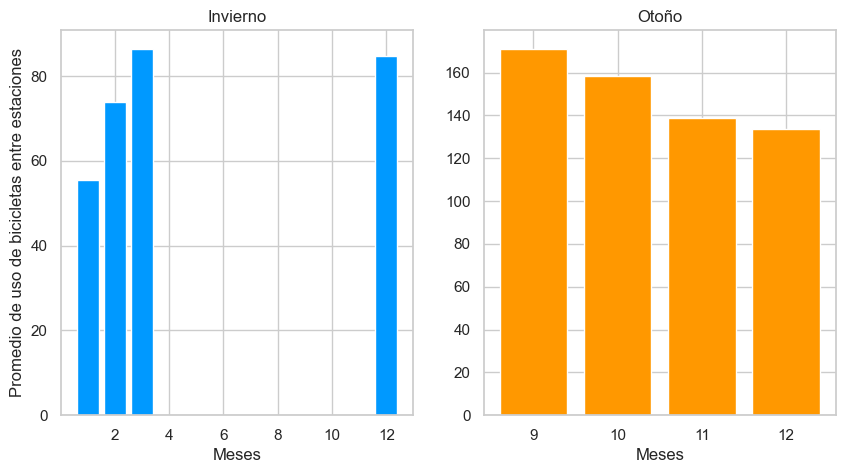

In [83]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

x = meses2
y = cnt2
axs[0].bar(x,y,color='#0099FF')
axs[0].set_title('Invierno')
axs[0].set_xlabel('Meses')
axs[0].set_ylabel('Promedio de uso de bicicletas entre estaciones');

x1 = dfH2.query('season == 4')['mnth']
y1 = dfH2.query('season == 4')['cnt']
axs[1].bar(x1,y1,color='#FF9800')
axs[1].set_title('Otoño');

axs[1].set_xlabel('Meses');

****

H3:
El verano es la temporada de mayor uso a nivel promedio. Ahora implementaremos el tipo de cliente, ¿Hay un uso significativo en el promedio de bicicletas entre clientes casuales y registrados?

In [84]:
from scipy.stats import mannwhitneyu
# Prueba de Mann-Whitney para dos muestras independientes
stat_mw, p_value_mw = mannwhitneyu(df2011['casual'][df2011['season'] == 3],
                                    df2011['registered'][df2011['season'] == 3])

# Hipótesis nula (H0): No hay diferencia significativa en el promedio de uso de biciletas entre clientes casuales y registrados durante la estación de verano.
# Hipótesis alternativa (Ha): Existe una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.

print(f"\nPrueba de Mann-Whitney para dos muestras independientes: stat = {stat_mw}, p_value = {p_value_mw}")

if p_value_mw < ALPHA:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.")


Prueba de Mann-Whitney para dos muestras independientes: stat = 954829.0, p_value = 1.6624932074773135e-282
Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa en el promedio de uso de bicicletas entre clientes casuales y registrados durante la estación de verano.


In [85]:
dfH3 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'})
dfH3

,casual,registered
mnth,,
6,30.737500,160.608333
7,37.990591,140.004032
8,27.867305,145.250342
9,31.883810,133.813333


GRAFICAR, PENSE EN UNO DE LINEAS -> NO ME GUSTA

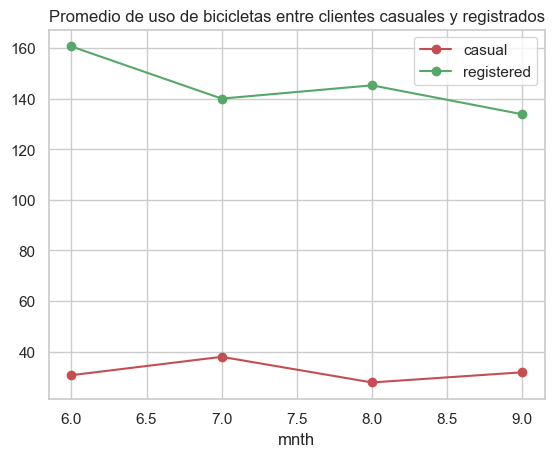

In [86]:
dfH3.plot(
    y=['casual', 'registered'],
    style=['o-r', 'o-g'],
    title='Promedio de uso de bicicletas entre clientes casuales y registrados'
).autoscale()

*****

H4 Como podemos analizar en el gráfico anterior, vemos que el mes de mayor uso para casuales se posa en el mes 7 y el de mnor uso: 9. Registrados: mayor uso 6 y menor 9 .Estos son distintos segun casuales y registrados.

In [87]:
dfH4 = df2011.query('season == 3').groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH4

,mnth,casual,registered
0,6,30.737500,160.608333
1,7,37.990591,140.004032
2,8,27.867305,145.250342
3,9,31.883810,133.813333


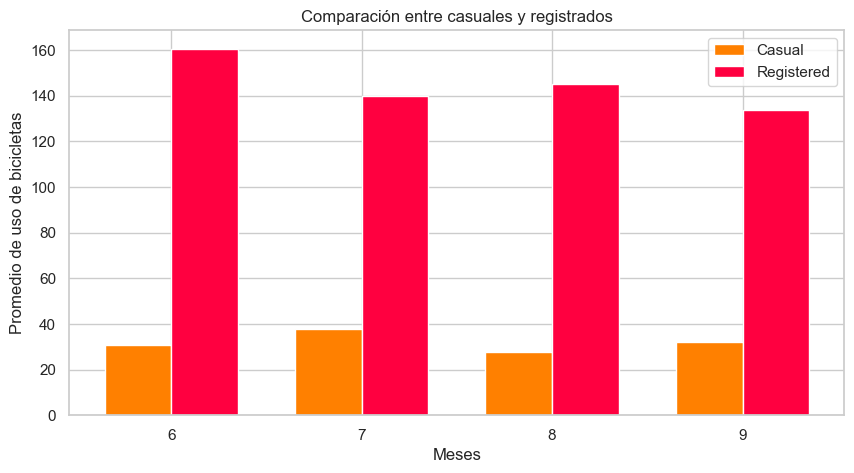

In [88]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH4['casual']
columna2_data = dfH4['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH4))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF8000')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#FF0040')

# Configura las etiquetas y la leyenda
plt.xlabel('Meses')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH4['mnth'])
plt.legend()

# Muestra el gráfico
plt.show()

*****

In [89]:
dfH5 = df2011.query('season == 3').groupby(['day']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5

,day,casual,registered
0,1,17.597222,166.458333
1,2,42.416667,150.152778
2,3,64.541667,111.430556
3,4,46.041667,127.416667
4,5,15.944444,133.222222
5,6,29.732394,123.760563
6,7,26.888889,113.930556
7,8,16.633803,119.957746
8,9,39.013889,141.250000
9,10,54.236111,135.666667


<Figure size 1500x1500 with 0 Axes>

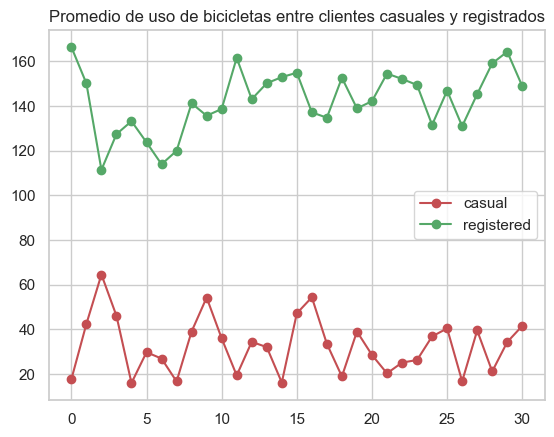

In [90]:
fig = plt.figure(figsize=(15,15))

dfH5.plot(
    y=['casual', 'registered'],
    style=['o-r', 'o-g'],
    title='Promedio de uso de bicicletas entre clientes casuales y registrados'
).autoscale()

plt.show()

****

H5 : Comparemos ahora según el tipo de cliente como frecuenta su uso, si es semanal o entre semana

In [91]:
dfH5 = df2011.query('season == 3').groupby(['weekday']).agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
dfH5.replace({0 : 'Lunes', 1 : 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6:'Domingo'}, inplace=True)
dfH5

,weekday,casual,registered
0,Lunes,18.250804,146.237942
1,Martes,19.310448,159.382090
2,Miércoles,17.991071,156.726190
3,Jueves,18.886567,152.310448
4,Viernes,18.208333,152.724359
5,Sábado,69.352941,114.320261
6,Domingo,69.940984,111.311475


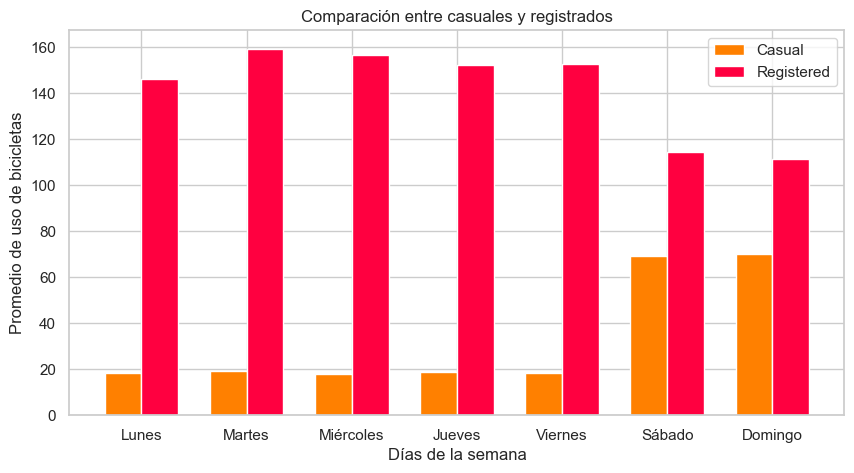

In [92]:
fig = plt.figure(figsize=(10,5))

columna1_data = dfH5['casual']
columna2_data = dfH5['registered']

# Obtén las posiciones de las barras
posiciones = range(len(dfH5))

# Configura el ancho de las barras
ancho_barra = 0.35

# Crea el gráfico de barras
plt.bar(posiciones, columna1_data, width=ancho_barra, label='Casual', color='#FF8000')
plt.bar([pos + ancho_barra for pos in posiciones], columna2_data, width=ancho_barra, label='Registered', color='#FF0040')

# Configura las etiquetas y la leyenda
plt.xlabel('Días de la semana')
plt.ylabel('Promedio de uso de bicicletas')
plt.title('Comparación entre casuales y registrados')
plt.xticks([pos + ancho_barra / 2 for pos in posiciones], dfH5['weekday'])
plt.legend()

# Muestra el gráfico
plt.show()

YO SE QUE TENGO OUTLIERS EN CASUAL, REGISTERED

In [93]:
df2011.describe()

,instant,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt
count,8645.000000,8645,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2011-07-03 09:29:50.213996800,2.513592,6.573973,15.665240,11.573626,3.009485,0.027646,0.683748,20.035049,23.453788,64.342973,1.437594,12.808213,23.668826,113.338577,137.007403
min,1.000000,2011-01-01 00:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2011-04-04 00:00:00,2.000000,4.000000,8.000000,6.000000,1.000000,0.000000,0.000000,13.000000,16.000000,49.000000,1.000000,7.000000,3.000000,26.000000,31.000000
50%,4323.000000,2011-07-04 00:00:00,3.000000,7.000000,16.000000,12.000000,3.000000,0.000000,1.000000,20.000000,24.000000,65.000000,1.000000,13.000000,14.000000,90.000000,108.000000
75%,6484.000000,2011-10-02 00:00:00,3.000000,10.000000,23.000000,18.000000,5.000000,0.000000,1.000000,27.000000,31.000000,81.000000,2.000000,19.000000,28.000000,163.000000,203.000000
max,8645.000000,2011-12-31 00:00:00,4.000000,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000,39.000000,50.000000,100.000000,4.000000,57.000000,272.000000,567.000000,581.000000
std,2495.740872,NaN,1.105477,3.428147,8.793108,6.907822,2.000845,0.163966,0.465040,8.126433,8.851484,19.629328,0.653859,8.253896,35.890149,108.346720,124.039052


In [94]:
df2011.query('casual >= 160 and weekday >= 0 and weekday <= 4').groupby(['weekday', 'day', 'mnth','hr'])[['casual']].count().reset_index()

,weekday,day,mnth,hr,casual


In [95]:
# df2011.query('dteday == "2011-11-25"')
# df2011.query('dteday == "2011-08-23"')

# df2011.query('dteday == "2011-07-04"') # -> un lunes

*****
Registrados

In [96]:
df2011.query('dteday == "2011-09-11"')

,instant,dteday,season,mnth,day,hr,weekday,holiday,workingday,temperature,thermal_sensation,humidity,weathersit,wind_speed,casual,registered,cnt,seasonteam
5963,5964,2011-09-11,3,9,11,0,6,0,0,25.0,28.0,88.0,1,0.0,29,79,108,calido
5964,5965,2011-09-11,3,9,11,1,6,0,0,25.0,28.0,88.0,2,0.0,22,66,88,calido
5965,5966,2011-09-11,3,9,11,2,6,0,0,25.0,30.0,78.0,2,13.0,16,60,76,calido
5966,5967,2011-09-11,3,9,11,3,6,0,0,25.0,30.0,78.0,2,6.0,15,30,45,calido
5967,5968,2011-09-11,3,9,11,4,6,0,0,25.0,28.0,83.0,1,9.0,3,6,9,calido
5968,5969,2011-09-11,3,9,11,5,6,0,0,25.0,28.0,83.0,1,9.0,15,24,39,calido
5969,5970,2011-09-11,3,9,11,6,6,0,0,24.0,27.0,88.0,1,7.0,4,16,20,calido
5970,5971,2011-09-11,3,9,11,7,6,0,0,25.0,27.0,88.0,1,0.0,9,28,37,calido
5971,5972,2011-09-11,3,9,11,8,6,0,0,26.0,30.0,78.0,1,0.0,25,69,94,calido
5972,5973,2011-09-11,3,9,11,9,6,0,0,27.0,31.0,74.0,1,0.0,59,168,227,calido


In [97]:
df2011.query('registered >= 300 and weekday >= 5').groupby(['weekday', 'day', 'mnth', 'hr'])[['registered']].count().reset_index()

,weekday,day,mnth,hr,registered


In [98]:
df2011.query('holiday == 1').groupby(['weekday', 'day', 'mnth'])[['casual']].sum().reset_index()

,weekday,day,mnth,casual
0,0,4,7,416
1,0,5,9,396
2,0,10,10,321
3,0,17,1,117
4,0,21,2,195
5,0,26,12,328
6,0,30,5,431
7,3,24,11,280
8,4,11,11,347
9,4,15,4,457


In [99]:
def imputar_outliers_por_fecha_y_hora(df, fecha, hora, columna_casual, fecha_especifica=None):
    """
    Imputa outliers en la columna_casual basándose en la mediana condicional de la fecha y/o la hora.

    Parámetros:
    - df: DataFrame, conjunto de datos.
    - fecha: str, nombre de la columna de fechas.
    - hora: int, valor entre 0 y 23 inclusive que representa la hora del día.
    - fecha_especifica: str, fecha específica en formato 'yyyy-mm-dd'. Por defecto es None.
    - columna_casual: str, nombre de la columna que se va a imputar.

    Retorna:
    - DataFrame con outliers imputados en la columna_casual.
    """
    # Filtra el DataFrame por la hora y/o la fecha especificada
    if fecha_especifica:
        df_filtrado = df[(df[fecha].dt.hour == hora) & (df[fecha].dt.date == pd.to_datetime(fecha_especifica).date())]
    else:
        df_filtrado = df[df[fecha].dt.hour == hora]

    # Calcula la mediana condicional de la columna_casual
    mediana_condicional = df_filtrado[columna_casual].median()

    # Imputa outliers basándose en la mediana condicional
    if fecha_especifica:
        df.loc[(df[fecha].dt.hour == hora) & (df[fecha].dt.date == pd.to_datetime(fecha_especifica).date()) & (df[columna_casual] > mediana_condicional * 1.5), columna_casual] = mediana_condicional
    else:
        df.loc[(df[fecha].dt.hour == hora) & (df[columna_casual] > mediana_condicional * 1.5), columna_casual] = mediana_condicional

    return df

# Ejemplo de uso
# Reemplaza 'nombre_columna_fecha', 'nombre_columna_casual', '2021-12-15' y 12 con tus nombres de columna, fecha y hora deseados.
datos_con_outliers_imputados = imputar_outliers_por_fecha_y_hora(df2011, 'dteday', 15, columna_casual='casual', fecha_especifica='2021-09-11')
